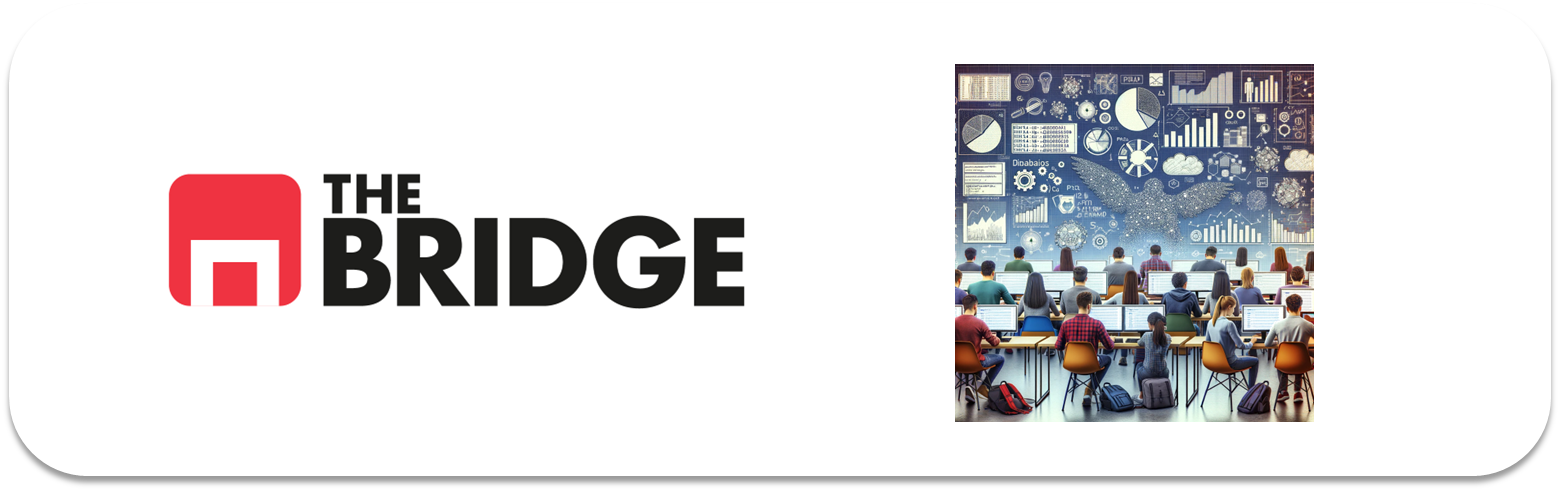

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



1. Cargar el Dataset

In [2]:
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics, model_selection
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
import seaborn as sns

In [3]:
# Cargar el dataset desde la ruta local
file_path = r"C:\Users\migue\Documents\GitHub\ONLINE_DS_THEBRIDGE_Miguel_repo_test\Sprint_10\Unidad_01\Practica_Obligatoria\data\hard_to_find\obligatoria_hard.csv"
df_housing = pd.read_csv(file_path, delimiter="|")

# Crear una copia del dataset
df_housing_copy = df_housing.copy()

# Mostrar un resumen estadístico
print(df_housing_copy.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   
std     28.148861    2.1057

In [4]:
# Verificar valores faltantes
print("\nValores faltantes por columna:")
print(df_housing_copy.isnull().sum())


Valores faltantes por columna:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64


2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.

In [5]:
# Primeros valores de la columna MEDV
print(df_housing_copy['MEDV'].head())


0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


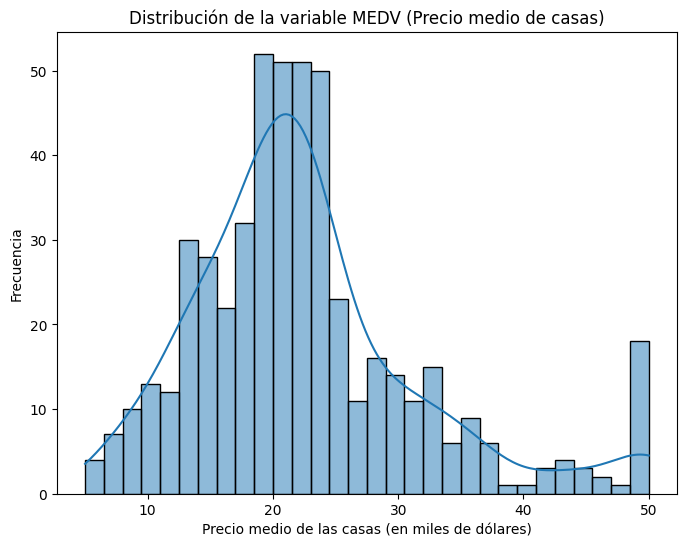

In [6]:
# Histograma de la variable MEDV
plt.figure(figsize=(8, 6))
sns.histplot(df_housing_copy['MEDV'], bins=30, kde=True)  # kde muestra una curva suavizada
plt.title('Distribución de la variable MEDV (Precio medio de casas)')
plt.xlabel('Precio medio de las casas (en miles de dólares)')
plt.ylabel('Frecuencia')
plt.show()

In [7]:
# Calcular la matriz de correlación
correlation_matrix = df_housing_copy.corr()

# Mostrar la correlación de todas las variables con MEDV
print(correlation_matrix['MEDV'].sort_values(ascending=False))


MEDV       1.000000
RM         0.695360
ZN         0.360445
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64


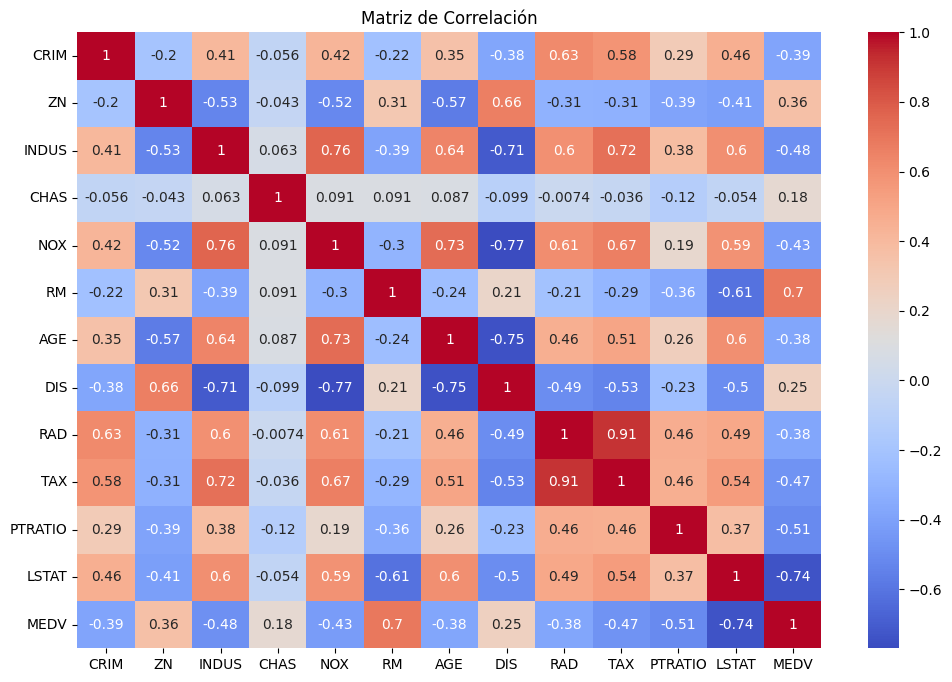

In [8]:
# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Matriz de Correlación')
plt.show()

Positivamente correlacionadas (Aumentan junto con MEDV):

- RM (0.695): Más habitaciones promedio → Mayor valor de las casas.
- ZN (0.36): Más terreno residencial → Mayor valor de las casas.
- DIS (0.25): Más distancia a centros de empleo → Ligero aumento en el valor.

Negativamente correlacionadas (Aumentan cuando MEDV disminuye):

- LSTAT (-0.737): Mayor % de población con estatus socioeconómico bajo → Menor valor de las casas.
- PTRATIO (-0.508): Mayor relación alumno-maestro → Menor valor de las casas.
- TAX (-0.468): Mayor tasa de impuestos → Menor valor de las casas.
- NOX (-0.427): Mayor concentración de óxidos de nitrógeno → Menor valor de las casas.
- CRIM (-0.388): Mayor tasa de criminalidad → Menor valor de las casas.

Correlación débil o baja relación:

- CHAS (0.17): Cercanía al río Charles parece no influir mucho.
- AGE (-0.37): Antigüedad de las casas tiene un efecto moderado.


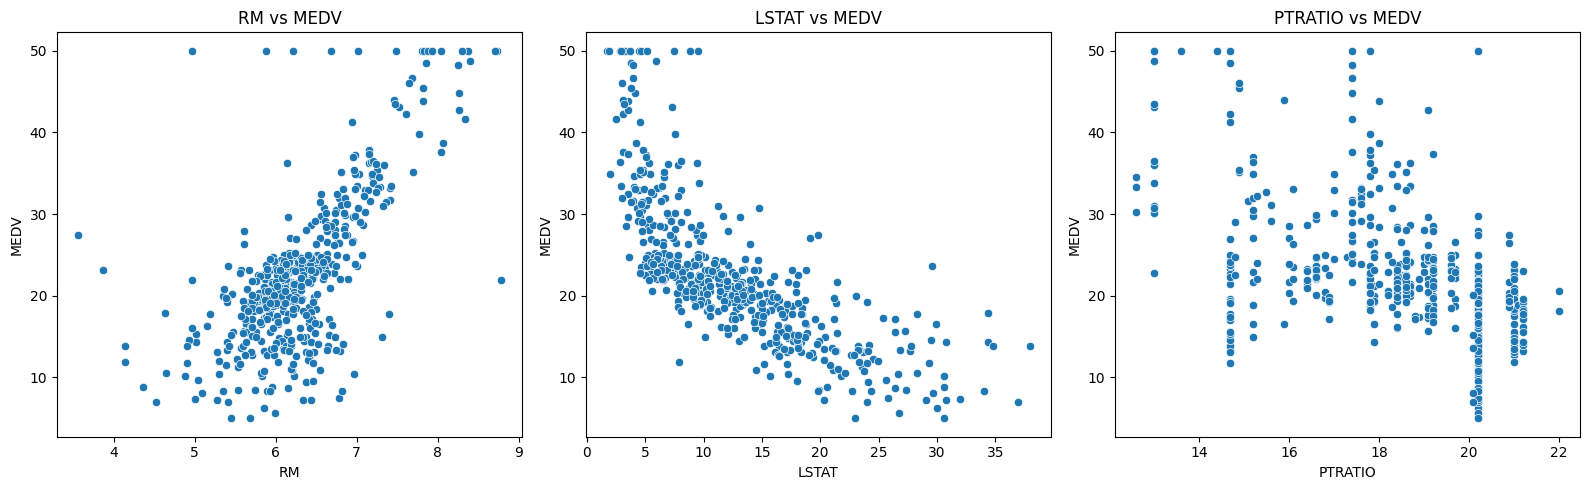

In [9]:
# Crear gráficos de dispersión para RM, LSTAT y PTRATIO
plt.figure(figsize=(16, 5))

# RM vs MEDV
plt.subplot(1, 3, 1)
sns.scatterplot(x=df_housing_copy['RM'], y=df_housing_copy['MEDV'])
plt.title('RM vs MEDV')

# LSTAT vs MEDV
plt.subplot(1, 3, 2)
sns.scatterplot(x=df_housing_copy['LSTAT'], y=df_housing_copy['MEDV'])
plt.title('LSTAT vs MEDV')

# PTRATIO vs MEDV
plt.subplot(1, 3, 3)
sns.scatterplot(x=df_housing_copy['PTRATIO'], y=df_housing_copy['MEDV'])
plt.title('PTRATIO vs MEDV')

plt.tight_layout()
plt.show()


- RM: Relación positiva clara con MEDV (más habitaciones, más valor).
- LSTAT: Relación negativa fuerte (a mayor pobreza, menor valor).
- PTRATIO: Relación negativa más moderada.

3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# Definir las variables X (características) e y (target)
X = df_housing_copy.drop(columns=['MEDV'])  
y = df_housing_copy['MEDV']


In [16]:
# Dividir los datos (80% entrenamiento, 20% prueba) ponemos que el 20% de los datos va a ser prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar el tamaño de los conjuntos para verificar
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (404, 12)
Tamaño del conjunto de prueba: (102, 12)


In [17]:
# Mostrar el número total de registros (filas y columnas)
total_registros = df_housing_copy.shape
print(f"El dataset tiene {total_registros[0]} registros y {total_registros[1]} columnas.")

El dataset tiene 506 registros y 13 columnas.


Los resultados nos indican que: 
- Conjunto de entrenamiento: 404 muestras (80% del total de 506 registros).
- Conjunto de prueba: 102 muestras (20% del total de 506 registros).

4. Construye las parejas X,y de train y test

- X_train → Características para entrenamiento (404 muestras, 12 columnas).
- y_train → Variable target para entrenamiento.
- X_test → Características para prueba (102 muestras, 12 columnas).
- y_test → Variable target para prueba.

5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.

In [18]:
# Resumen estadístico del conjunto de entrenamiento
print(X_train.describe())


             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean     3.609125   11.569307   10.985050    0.071782    0.556484    6.315891   
std      8.875058   23.152481    6.894618    0.258447    0.117704    0.709452   
min      0.009060    0.000000    0.740000    0.000000    0.385000    3.863000   
25%      0.081437    0.000000    5.130000    0.000000    0.452000    5.890500   
50%      0.261390    0.000000    8.560000    0.000000    0.538000    6.210000   
75%      3.202962   20.000000   18.100000    0.000000    0.631000    6.636750   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO       LSTAT  
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000  
mean    68.556436    3.808195    9.356436  404.032178   18.318317   12.457351  
std     27.994922    2.131226 

In [19]:
# Revisar valores faltantes
print(X_train.isnull().sum())


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
dtype: int64


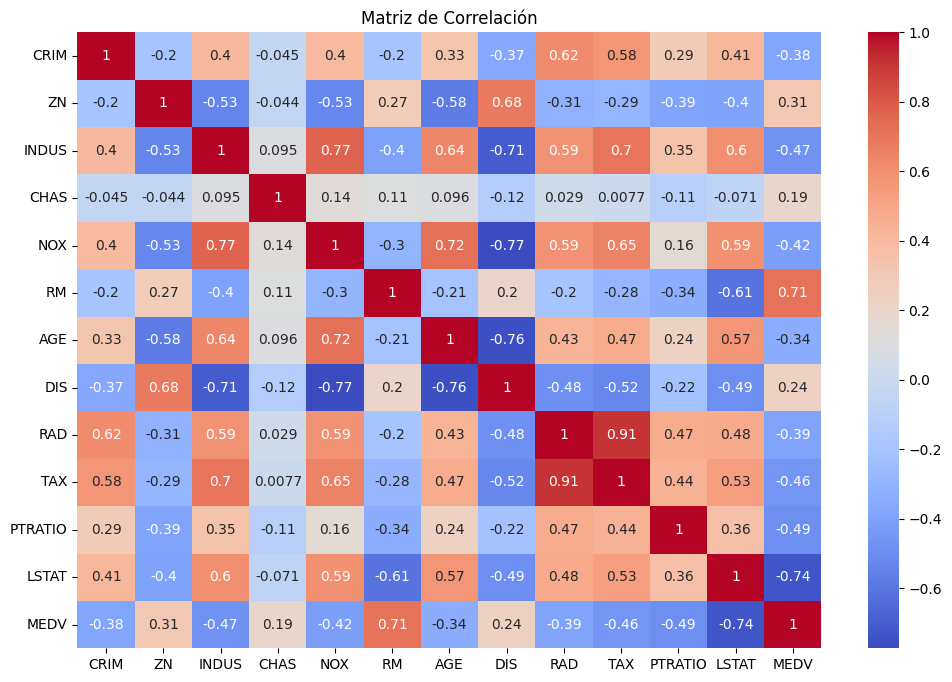

In [20]:
# Crear un heatmap para visualizar correlaciones
plt.figure(figsize=(12,8))
correlation_matrix = pd.concat([X_train, y_train], axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Matriz de Correlación')
plt.show()

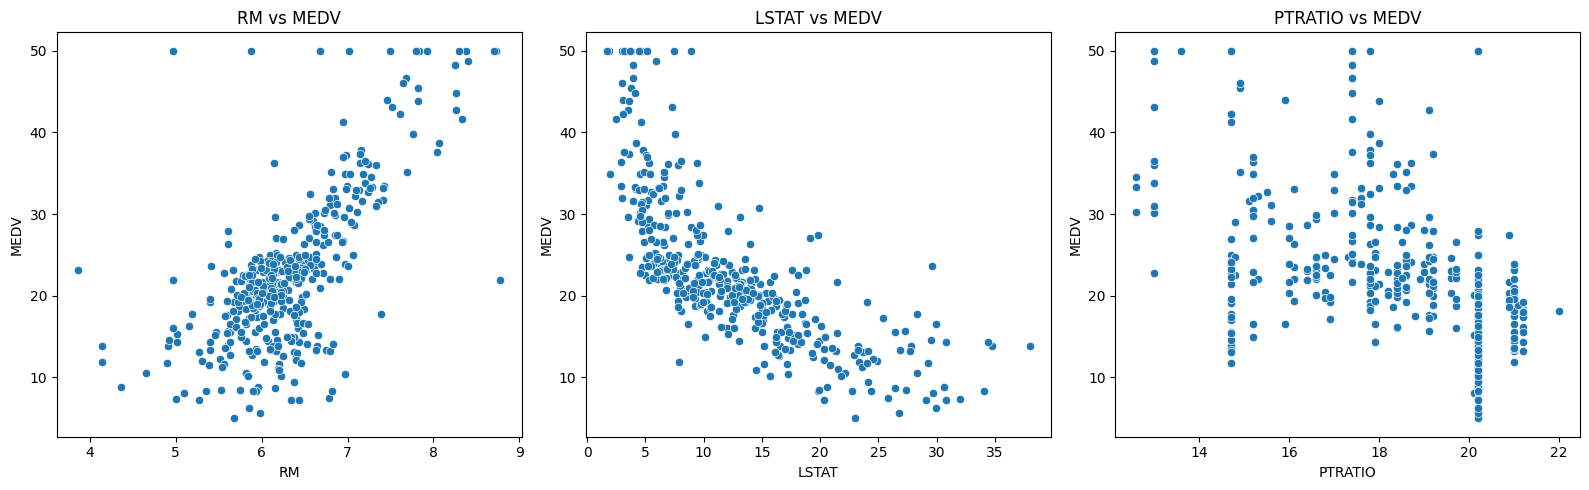

In [21]:
# Gráficos de dispersión para RM, LSTAT y PTRATIO
plt.figure(figsize=(16, 5))

# RM vs MEDV
plt.subplot(1, 3, 1)
sns.scatterplot(x=X_train['RM'], y=y_train)
plt.title('RM vs MEDV')

# LSTAT vs MEDV
plt.subplot(1, 3, 2)
sns.scatterplot(x=X_train['LSTAT'], y=y_train)
plt.title('LSTAT vs MEDV')

# PTRATIO vs MEDV
plt.subplot(1, 3, 3)
sns.scatterplot(x=X_train['PTRATIO'], y=y_train)
plt.title('PTRATIO vs MEDV')

plt.tight_layout()
plt.show()

En base a los gráficos realizados en la parte 1 se puede identificar que: 

- Relaciones claras: RM y LSTAT tienen relaciones claras con MEDV, lo que es ideal para un modelo de regresión lineal.
- Sin valores faltantes: No es necesario realizar imputación de valores.
- Distribución sesgada: La variable MEDV está sesgada a la derecha, lo que podría afectar la linealidad del modelo.
- Posibles outliers: Algunos valores extremos detectados, especialmente en LSTAT y MEDV.


Estadística descriptiva:

- Se analizaron las medias, medianas y valores extremos de las variables.
- Confirmación de que no existen valores faltantes.

Correlación entre las variables:

- Se generó un heatmap (mapa de calor) para visualizar las relaciones entre variables.
- Se identificaron variables con alta correlación con MEDV como RM (positiva) y LSTAT (negativa).

Visualización gráfica (scatter plots):

- Se realizaron gráficos de dispersión entre MEDV y las variables más correlacionadas (RM, LSTAT, PTRATIO).
- Se confirmó visualmente que RM tiene una relación positiva con MEDV y LSTAT una relación negativa.

6. Trata las variables para que funcionen lo mejor posible en el modelo.

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
# Inicializar el escalador
scaler = StandardScaler()

# Ajustar y transformar solo los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Transformar los datos de prueba con los mismos parámetros
X_test_scaled = scaler.transform(X_test)

In [24]:
# Revisar la media y desviación estándar después de escalar
print("Media después de escalar (aproximadamente 0):", X_train_scaled.mean(axis=0))
print("Desviación estándar después de escalar (aproximadamente 1):", X_train_scaled.std(axis=0))

Media después de escalar (aproximadamente 0): [-2.63815372e-17  0.00000000e+00 -4.17707673e-17  1.31907686e-17
 -5.11142284e-16 -2.61616911e-16 -4.85859977e-16  5.24882668e-17
 -9.45338417e-17 -1.51693839e-16  8.51903806e-16 -1.79174607e-16]
Desviación estándar después de escalar (aproximadamente 1): [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [25]:
# Aplicar transformación logarítmica a y_train y y_test 
y_train_transformed = np.log1p(y_train)
y_test_transformed = np.log1p(y_test)

- Las variables predictoras (X_train_scaled y X_test_scaled) han sido estandarizadas.
- La variable objetivo y no ha sido modificada en este caso.

7. Construye un modelo de regresión lineal.

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
# Crear el modelo de regresión lineal
linear_model = LinearRegression()

In [28]:
# Entrenar el modelo con los datos de entrenamiento
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

In [29]:
# Realizar predicciones con los datos de prueba
y_pred = linear_model.predict(X_test_scaled)

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calcular métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Imprimir las métricas
print(f"MAE: {mae:.2f}") 
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

MAE: 3.11
MSE: 22.78
RMSE: 4.77
R²: 0.69


- MAE (Error Absoluto Medio): Promedio de las diferencias absolutas entre predicciones y valores reales.
- MSE (Error Cuadrático Medio): Promedio de los errores al cuadrado.
- RMSE (Raíz del Error Cuadrático Medio): Raíz cuadrada del MSE, es útil para interpretar en la misma escala que MEDV.
- R² (Coeficiente de Determinación): Mide qué tan bien se ajusta el modelo a los datos (1 es el mejor ajuste).

MAE (Error Absoluto Medio): 3.11
- En promedio, el modelo se equivoca por aproximadamente 3.11 miles de dólares al predecir el precio de las casas.

MSE (Error Cuadrático Medio): 22.78
- El error cuadrático medio es un poco alto, lo que indica cierta variabilidad en los errores del modelo.

RMSE (Raíz del Error Cuadrático Medio): 4.77
- El error promedio considerando la escala original de MEDV es 4.77 miles de dólares, lo que aún es significativo.

R² (Coeficiente de Determinación): 0.69
- El modelo explica aproximadamente el 69% de la variabilidad en los precios de las casas, lo que es un resultado moderado y aceptable, pero no llega a ser perfecto.

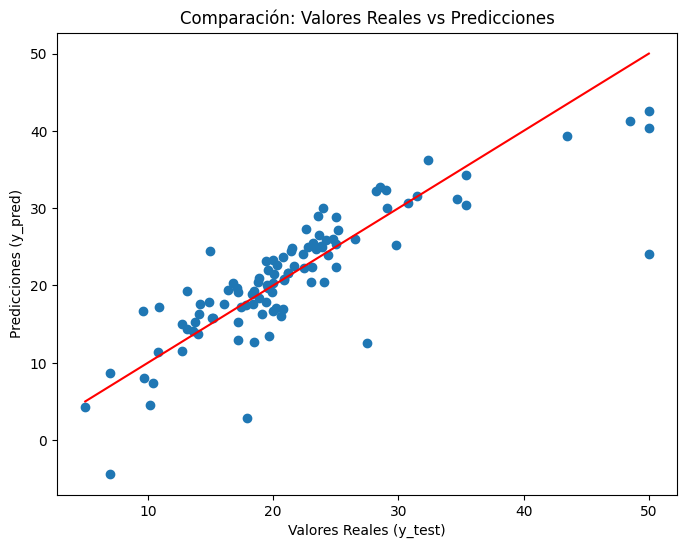

In [31]:
# Comparación gráfica
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Línea de referencia
plt.xlabel('Valores Reales (y_test)')
plt.ylabel('Predicciones (y_pred)')
plt.title('Comparación: Valores Reales vs Predicciones')
plt.show()

8. Analiza si lo crees conveniente los pesos y la importancia de las features.

In [32]:
# Extraer los coeficientes del modelo entrenado
coefficients = linear_model.coef_

#  DataFrame para visualizarlos junto con los nombres de las columnas
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

# Ordenar de mayor a menor la importancia
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# Mostrar la importancia de las variables
feature_importance


,Feature,Coefficient
5,RM,3.004420
8,RAD,2.058898
3,CHAS,0.787152
1,ZN,0.712109
2,INDUS,0.173858
6,AGE,-0.100500
0,CRIM,-1.127473
9,TAX,-1.871317
10,PTRATIO,-1.991871
4,NOX,-2.137599


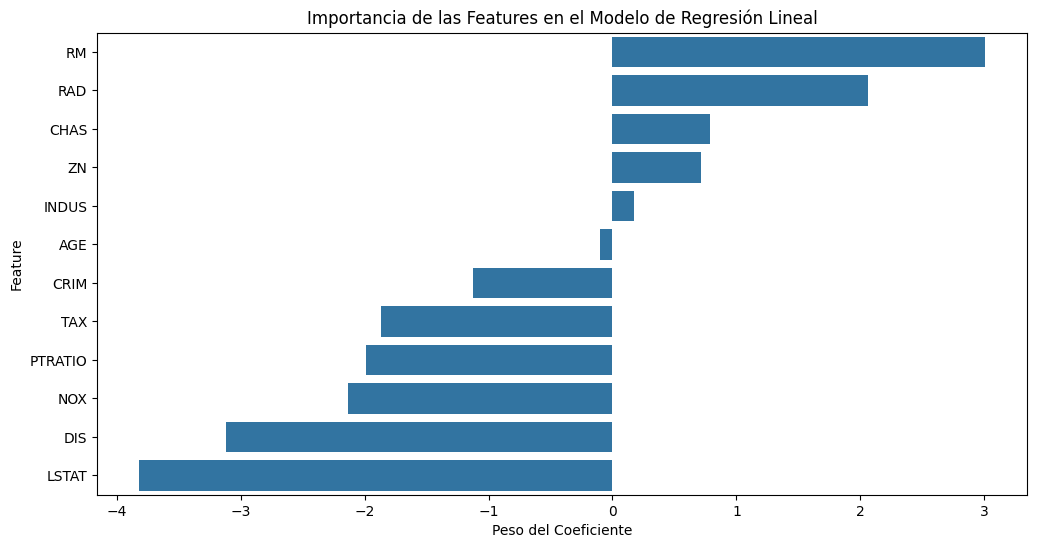

In [33]:
# Visualizar los coeficientes con un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title('Importancia de las Features en el Modelo de Regresión Lineal')
plt.xlabel('Peso del Coeficiente')
plt.ylabel('Feature')
plt.show()


Variables con mayor impacto positivo:
- RM (3.00) → A más habitaciones promedio, mayor es el valor de las casas.
- RAD (2.06) → Mayor accesibilidad a autopistas radiales parece estar relacionado con un aumento en el valor de las casas.
- CHAS (0.79) → Estar cerca del río Charles parece tener un ligero efecto positivo en el valor.

Interpretación: Un aumento en estas variables tiende a aumentar el precio de las casas.

Variables con impacto negativo (reducción del valor de las casas):
- LSTAT (-3.82) → Un mayor porcentaje de población con estatus socioeconómico bajo reduce significativamente el valor de las casas.
- DIS (-3.12) → Mayor distancia a centros de empleo también está asociado con precios más bajos.
- NOX (-2.14) → Altos niveles de óxidos de nitrógeno (contaminación) parecen reducir los precios de las casas.
- PTRATIO (-1.99) → Una mayor relación alumno-maestro disminuye el valor de las casas.

Interpretación: Un aumento en estas variables tiende a reducir el valor de las casas.

Las variables más importantes:

- Positivas: RM (número de habitaciones).
- Negativas: LSTAT (pobreza), DIS (distancia a empleo).

Relaciones esperadas:

- Más habitaciones (RM) aumenta el valor, mientras que un alto porcentaje de pobreza (LSTAT) lo disminuye, lo cual tiene sentido en el contexto inmobiliario.

¿Sobreajuste?

- Algunos coeficientes parecen muy grandes, lo que puede indicar sobreajuste.
La regularización podría ayudar a reducir este efecto.

8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.

In [34]:
# Realizar predicciones usando los datos de prueba
y_pred = linear_model.predict(X_test_scaled)

# Calcular métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Imprimir las métricas
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

MAE: 3.11
MSE: 22.78
RMSE: 4.77
R²: 0.69


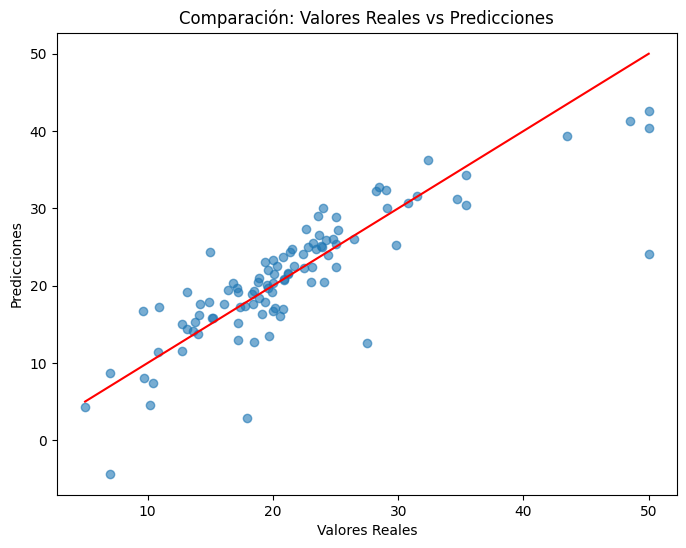

In [35]:
# Comparación gráfica de Predicciones vs Valores Reales
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # Línea ideal
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación: Valores Reales vs Predicciones')
plt.show()

Tal cual lo vimos en la parte 7 se puede ver que: 
- El modelo tiene un rendimiento decente pero no perfecto (R² = 0.69).
- Errores moderados: MAE y RMSE sugieren una precisión aceptable, pero mejorable.



9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.

In [36]:
from sklearn.linear_model import Ridge

# Crear el modelo Ridge con un hiperparámetro alpha (intensidad de regularización)
ridge_model = Ridge(alpha=1.0)

# Entrenar el modelo Ridge con los datos de entrenamiento
ridge_model.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Evaluar el modelo Ridge
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Mostrar las métricas del modelo Ridge
print(f"\nRidge Regression Metrics:")
print(f"MAE: {mae_ridge:.2f}")
print(f"MSE: {mse_ridge:.2f}")
print(f"RMSE: {rmse_ridge:.2f}")
print(f"R²: {r2_ridge:.2f}")



Ridge Regression Metrics:
MAE: 3.11
MSE: 22.81
RMSE: 4.78
R²: 0.69


- Vamos a probar con tres valores distintos de alpha: 0.1, 1.0 y 10.0

In [37]:
# Probar diferentes valores de alpha para Ridge
alphas = [0.1, 1.0, 10.0]

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_scaled, y_train)
    y_pred_ridge = ridge_model.predict(X_test_scaled)
    r2_ridge = r2_score(y_test, y_pred_ridge)
    print(f"\nRidge Regression (alpha={alpha}): R² = {r2_ridge:.2f}")


Ridge Regression (alpha=0.1): R² = 0.69

Ridge Regression (alpha=1.0): R² = 0.69

Ridge Regression (alpha=10.0): R² = 0.69


In [38]:
from sklearn.linear_model import ElasticNet

# Crear el modelo ElasticNet con alpha
elastic_model = ElasticNet(alpha=1.0, l1_ratio=0.5)  # l1_ratio=0.5 balancea L1 y L2

# Entrenar el modelo
elastic_model.fit(X_train_scaled, y_train)

# Realizar predicciones con ElasticNet
y_pred_elastic = elastic_model.predict(X_test_scaled)

# Evaluar el modelo ElasticNet
mae_elastic = mean_absolute_error(y_test, y_pred_elastic)
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
rmse_elastic = np.sqrt(mse_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)

# Mostrar las métricas del modelo ElasticNet
print(f"\nElasticNet Regression Metrics:")
print(f"MAE: {mae_elastic:.2f}")
print(f"MSE: {mse_elastic:.2f}")
print(f"RMSE: {rmse_elastic:.2f}")
print(f"R²: {r2_elastic:.2f}")


ElasticNet Regression Metrics:
MAE: 3.38
MSE: 28.01
RMSE: 5.29
R²: 0.62


In [39]:
print(f"\nComparación de Modelos:")
print(f"Regresión Lineal: R² = {r2:.2f}")
print(f"Ridge Regression: R² = {r2_ridge:.2f}")
print(f"ElasticNet: R² = {r2_elastic:.2f}")



Comparación de Modelos:
Regresión Lineal: R² = 0.69
Ridge Regression: R² = 0.69
ElasticNet: R² = 0.62


10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?

Regresión Lineal y Ridge:

- Ambos modelos (R² = 0.69) ofrecen un desempeño similar.
- La regularización Ridge no parece haber mejorado significativamente el modelo, lo que indica que el sobreajuste no era un problema crítico con estos datos.

ElasticNet:

- El R² ha disminuido a 0.62, lo que indica que el modelo perdió capacidad predictiva.
- Esto sugiere que la penalización de ElasticNet puede haber eliminado o reducido coeficientes importantes.

En general se puede ver que: 
- El modelo más adecuado parece ser el de Regresión Lineal Simple o Ridge ya que presentan un desempeño idéntico con R² = 0.69.
- ElasticNet parece demasiado restrictivo para este dataset en particular.
- ElasticNet tuvo un peor desempeño, probablemente porque eliminó información relevante con su penalización combinada.
- No se observó sobreajuste evidente, lo que hace que la regularización sea innecesaria en este caso específico.

